<h1>Mallit: Viinien luokittelu rypälelajikkeen mukaan (päätöspuu-menetelmä)</h1>

In [1]:
#Tuodaan tarvittavat ohjelmakirjastot:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Avataan tiedosto
df = pd.read_excel('http://taanila.fi/wine.xlsx')
df

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13'],
      dtype='object')

In [4]:
#Vaihdetaan sarakkeille kuvaavammat nimet:
df.columns = ['Y', 'Alcohol', 'Malic acid','Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [5]:
df.head()

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.describe()

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


C:\Users\Henri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Henri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


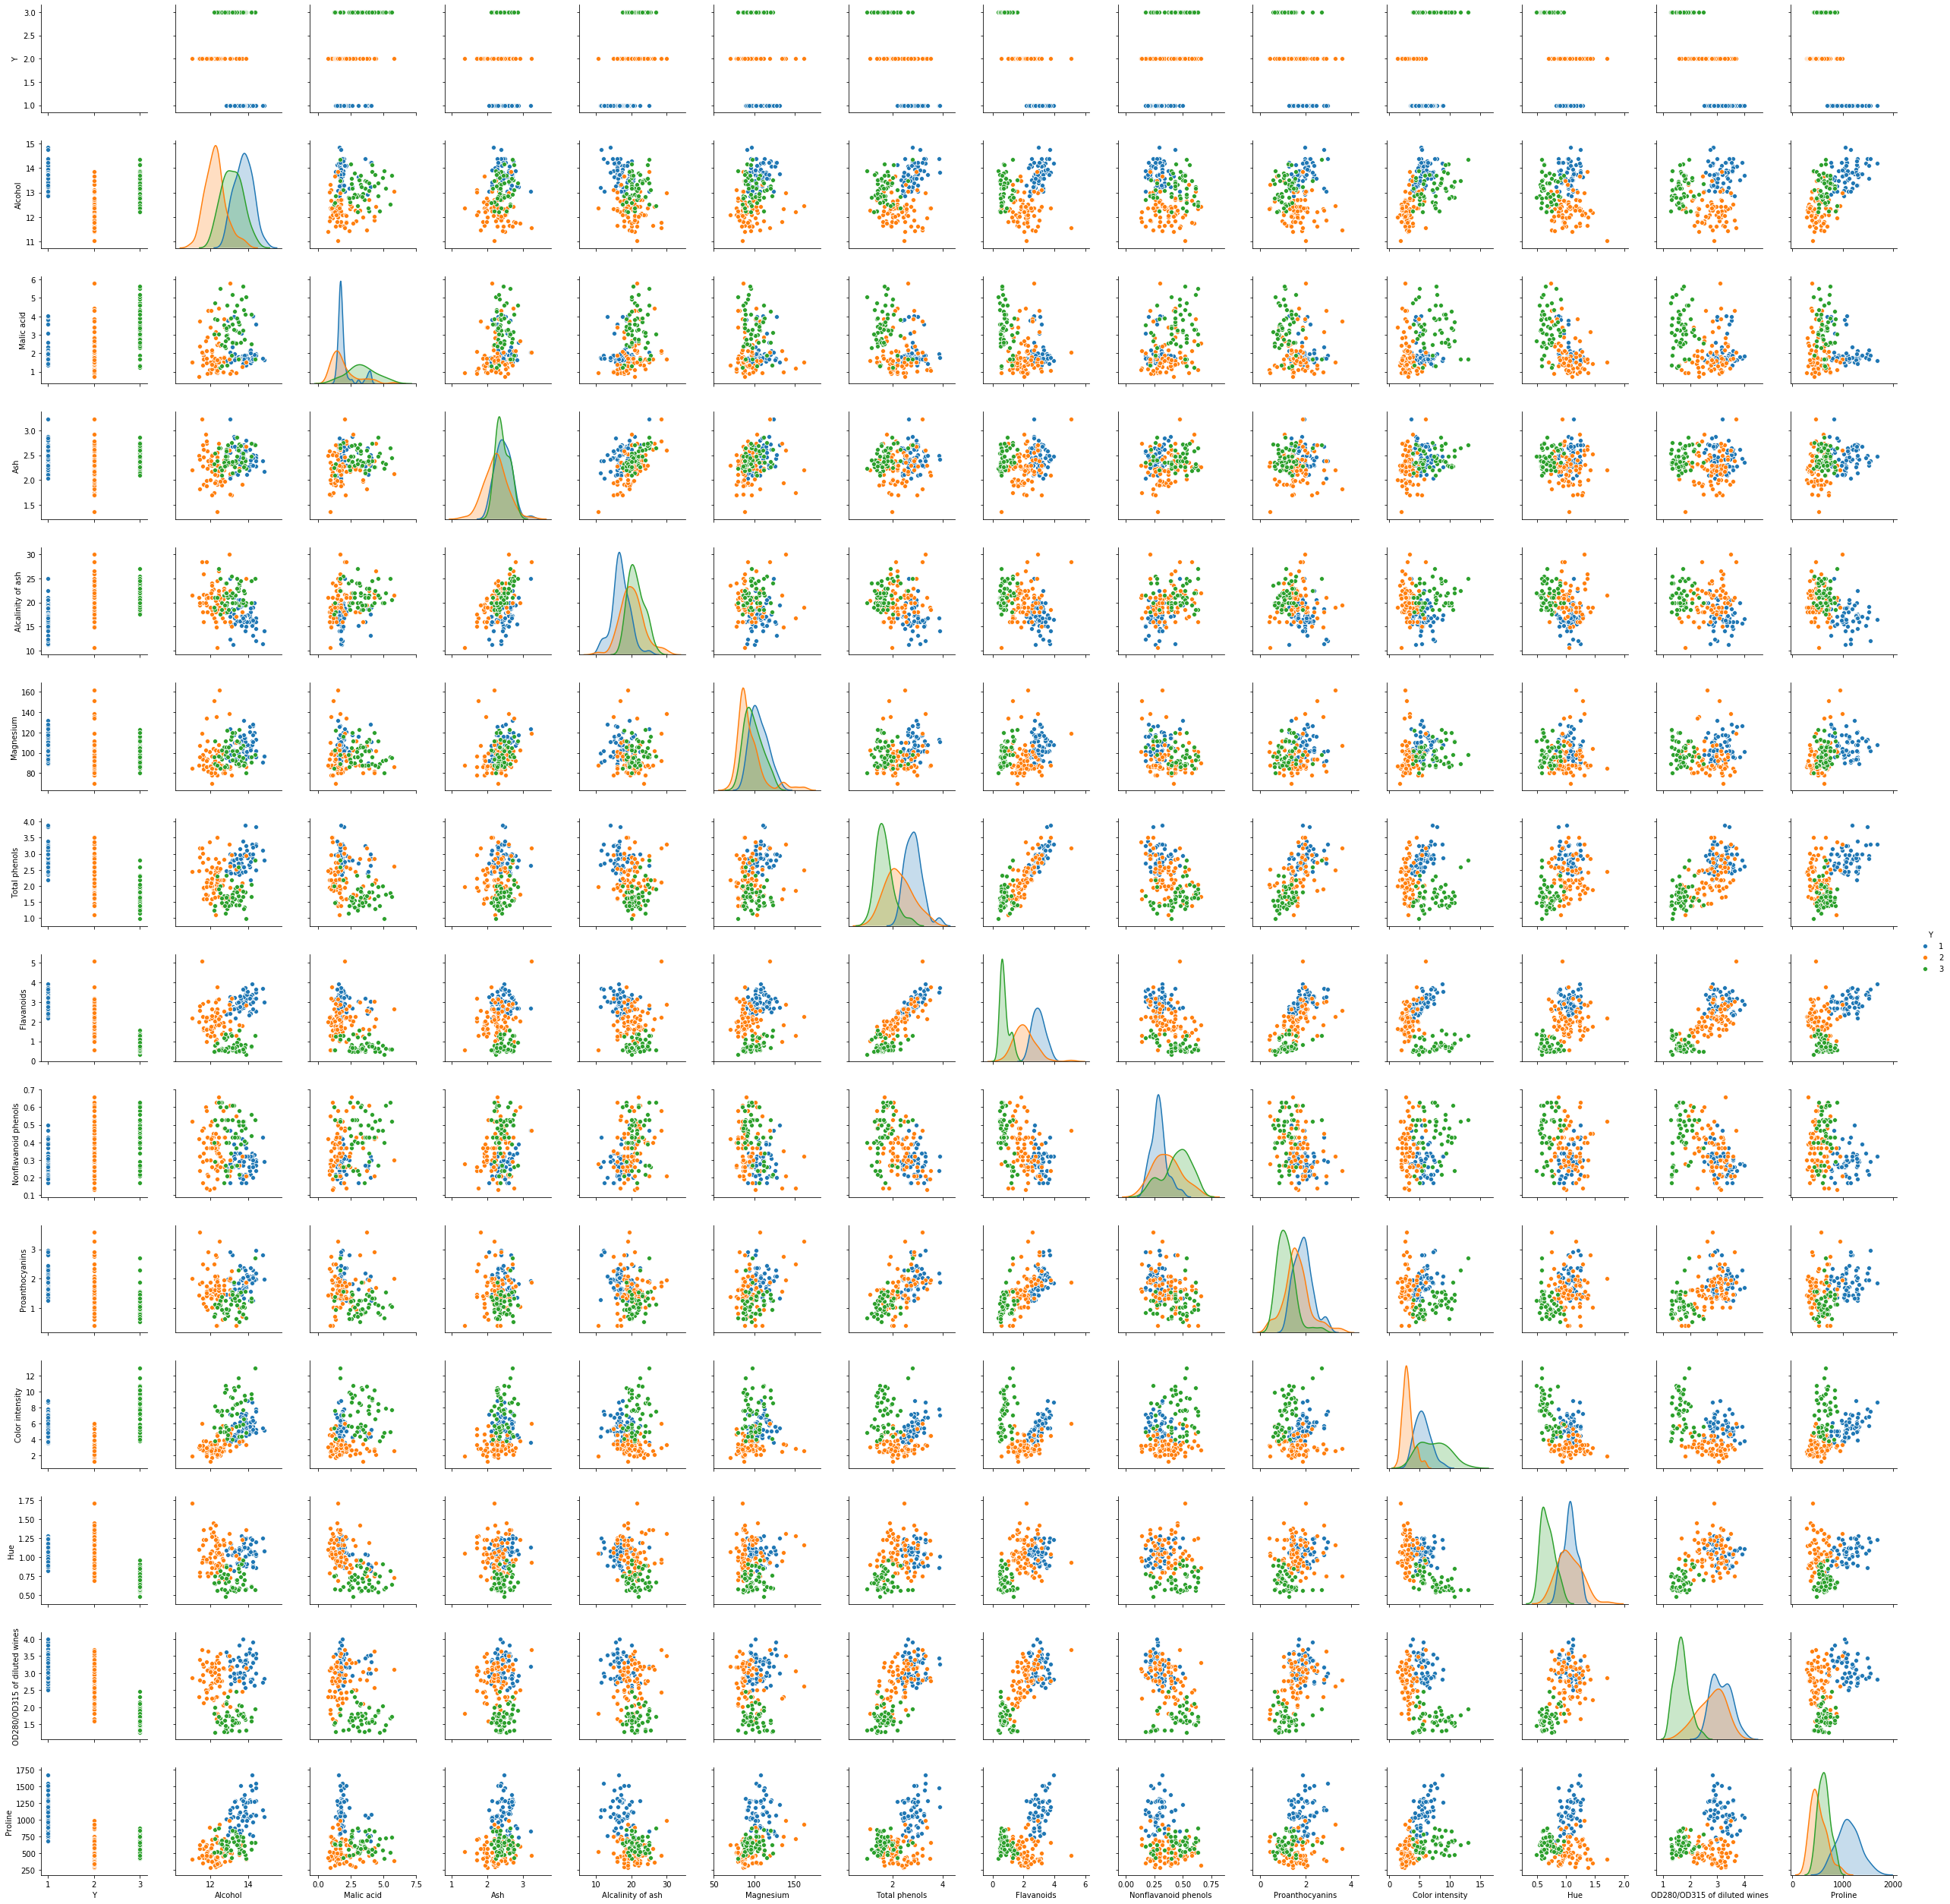

In [7]:
sns.pairplot(df, hue='Y')

In [8]:
#Feature-matriisi:
X = df.drop('Y', axis=1)
#Target:
y = df['Y']

In [9]:
#train_test_split jakaa datan opetusdataan ja testidataan (25 % datasta ellei toisin määrätä).
#random_state määrittää satunnaislukugeneraattorin siemenluvun. Sama siemenluku takaa saman jaottelun
#eri suorituskerroilla.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [10]:
#Gaussian naive bayes -mallin tuonti:
from sklearn import tree

#Mallin sovitus:
malli = tree.DecisionTreeClassifier(max_depth=4)
malli.fit(X_train, y_train)

#Mallin mukaisten ennusteiden laskeminen opetus- ja testidatalle:
y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

In [11]:
#Oikeaan osuneiden ennusteiden osuus opetusdatassa:

from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_malli)

1.0

In [12]:
#Oikeaan osuneiden ennusteiden osuus testidatassa:
accuracy_score(y_test, y_test_malli)

0.9111111111111111

In [13]:
#Confusion-matriisi opetusdatalle:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_malli))

[[40  0  0]
 [ 0 57  0]
 [ 0  0 36]]


Malli osaa luokitella opetusdatasta oikein kaikki eri rypälelajikkeista valmistetut viinit.

In [14]:
#Confusion-matriisi testidatalle:
print(confusion_matrix(y_test, y_test_malli))

[[17  2  0]
 [ 1 12  1]
 [ 0  0 12]]


Malli osaa luokitella testidatasta oikein kaikki rypälelajikkeesta 3 valmistetut viinit. Rypälelajikkeesta 1 valmistetuista viineistä kaksi on luokiteltu virheellisesti rypälelajista 2 valmistetuksi viiniksi. Rypälelajikkeesta 2 valmistetuista viineistä yksi on luokiteltu virheellisesti rypälelajista 1 valmistetuksi viiniksi ja yksi on luokiteltu virheellisesti rypälelajista 3 valmistetuksi viiniksi.

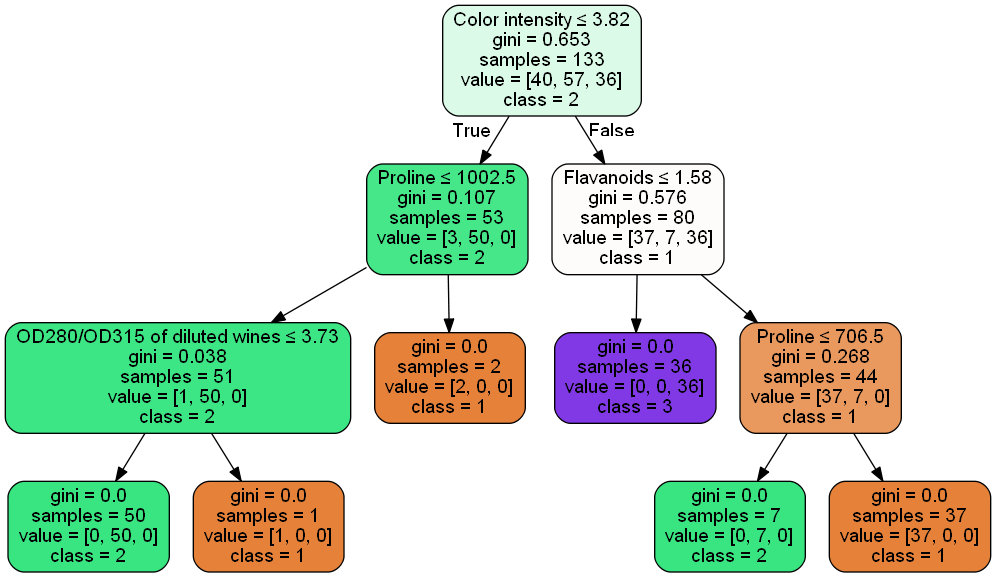

In [15]:
#Havainnollistetaan päätöspuuta graafisesti:
#Seuraava edellyttää pydotplus-kirjaston asentamista ja python-graphviz-apuohjelman asentamista:
import pydotplus 
from IPython.display import Image  

#Windowsin path-määrittely, lisätietoa: https://datascience.stackexchange.com/a/56428
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data = tree.export_graphviz(malli, out_file=None, 
                         feature_names=X.columns,
                         class_names=['1', '2', '3'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())